# Download the churches of L.A. County

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
import json
import numpy as np
import altair as alt
import altair_latimes as lat

In [4]:
alt.themes.register("latimes", lat.theme)
alt.themes.enable("latimes")
pd.options.display.max_columns = 50
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

### Scrape the data from L.A. County's Esri API enpoint

In [35]:
# LMS data server: https://public.gis.lacounty.gov/arcgis/rest/services/LACounty_Dynamic/LMS_Data_Public/MapServer

In [36]:
# !agsout -s input/geo/services.txt -o input/geo/

### Read the scraped file into a GeoDataFrame

In [45]:
gdf = gpd.read_file(
    "raw/geo/la_county_churches/la_county_churches_1612460219298.geojson"
)

<AxesSubplot:>

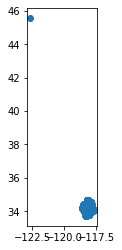

In [46]:
gdf.plot()

### Which are the outlier churches? Sort by latitude

In [47]:
gdf.sort_values("latitude", ascending=False).head(1)

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,city,state,hours,phones,url,info1,info2,post_id,description,zip,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y,geometry
201,25358,HSIP Freedom Gnis_structures,1878096,Community Groups,Churches,None,Bethany Baptist Church of West Los Angeles,Bethany Baptist Church of West Los Angeles,4115 W. Martin Luther King Blvd.,None,Los Angeles,CA,None,(323) 296 - 7223\r\n,None,None,None,27754,,90008,http://egis3.lacounty.gov/lms/?p=27754,publish,45.553773,-122.661623,1379067370000,None,None,5.345461e+06,6.083300e+06,POINT (-122.66162 45.55377)


### Change 'Bethany Baptist Church of West Los Angeles'

In [48]:
gdf.loc[
    gdf.org_name == "Bethany Baptist Church of West Los Angeles", "latitude"
] = 34.0167573

In [49]:
gdf.loc[
    gdf.org_name == "Bethany Baptist Church of West Los Angeles", "longitude"
] = -118.3457184

### Redo geometry with new coordinates

In [50]:
gdf["longitude"] = pd.to_numeric(gdf["longitude"], errors="coerce")
gdf["latitude"] = pd.to_numeric(gdf["latitude"], errors="coerce")

In [51]:
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude))

### Did it work? 

<AxesSubplot:>

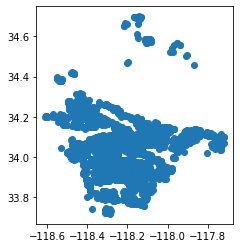

In [52]:
gdf.plot()

---

### Export

In [54]:
gdf.to_file("raw/geo/churches.geojson", driver="GeoJSON")